#Preprocessing

In [17]:
# Import Library
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk import word_tokenize
import requests
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [18]:
# Load data
df = pd.read_csv("otomotif.csv")

# Optional: Sample and inspect the data
df.isna().sum()
df['text'].duplicated().sum()

# Remove duplicates and short texts
df = df.drop_duplicates(subset=["text"])
df = df[df['text'].str.len() >= 4]

df.sample(n=5)

,_id,date,keyword,username,real_name,service,sentiment,text,sentiment_val,Log
148,63e07ebc71027138bcf0ee76,6/2/2023 17:05,1167,NaN,Lala Nasmoco Siliwangi,instagram,0,Terimakasih mas Azar atas pembelian unit Toyot...,neutral,NaN
49,63e2f93571027138bc8c8df3,8/2/2023 15:11,5815,NaN,suzukibali_official,instagram,0,Wahh... Bagasi Suzuki XL dengan volume maksima...,neutral,NaN
28,63e2eade71027138bc47a5d0,8/2/2023 12:25,7180,NaN,NaN,blogs,5,Wuling tampaknya bakal buat kejutan lagi setel...,positive,NaN
177,63dfe75f71027138bc2c60f7,6/2/2023 7:07,6418,NaN,HONDA MUGEN,instagram,15,"Terima kasih pak F, sudah mempercayakan pembel...",positive,NaN
26,63e07e1471027138bcecbf28,6/2/2023 16:35,5840,NaN,nanang_reliana,instagram,15,YA UNTUNG PAKAI PRIMEPREMIUM SERIESBLUE RUBBER...,positive,NaN


#Case Folding

In [19]:
# Case folding
df['casefolding'] = df['text'].str.lower()

# Cleaning
def cleaning_text(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    text = re.sub(r'@[\w]*', ' ', text)
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")
    text = text.replace('\\t', " ").replace(
        '\\n', " ").replace('\\u', " ").replace('\\', "")
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text


df['cleanedtext'] = df['casefolding'].apply(cleaning_text)
df.sample(n=5)

,_id,date,keyword,username,real_name,service,sentiment,text,sentiment_val,Log,casefolding,cleanedtext
222,63e2caa871027138bcb254f2,8/2/2023 12:02,5824,NaN,PT NUSANTARA JAYA SENTOSA,twitter,5,Tampil lebih Elegant dan stylish dengan NewErt...,positive,NaN,tampil lebih elegant dan stylish dengan newert...,tampil lebih elegant dan stylish dengan newert...
215,63e02da971027138bc71e78c,6/2/2023 12:21,5840,NaN,Terbaiktronics,instagram,0,taugasih sobatronics biaya beli AC dan pasangn...,neutral,NaN,taugasih sobatronics biaya beli ac dan pasangn...,taugasih sobatronics biaya beli ac dan pasangn...
196,63e07e5571027138bcee5824,6/2/2023 17:10,3674,NaN,Wira Toyota,instagram,0,Terima kasih banyak kepada bapak Budi telah me...,neutral,NaN,terima kasih banyak kepada bapak budi telah me...,terima kasih banyak kepada bapak budi telah me...
246,63e07ef971027138bcf27c73,6/2/2023 13:07,5810,NaN,BeliMobilGue.co.id,instagram,5,Suzuki Ignis . GX AGS Bensin AT BiruHarga Cash...,positive,NaN,suzuki ignis . gx ags bensin at biruharga cash...,suzuki ignis gx ags bensin at biruharga cash...
173,63e07dd771027138bceb7058,6/2/2023 15:51,6418,NaN,HONDA MUGEN,instagram,15,"Terima kasih pak S, sudah kedua kalinya memper...",positive,NaN,"terima kasih pak s, sudah kedua kalinya memper...",terima kasih pak s sudah kedua kalinya memper...


#Penghapusan Stopword

In [20]:
# Stopword removal
nltk.download('stopwords')
nltk.download('punkt')

sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
stopwords_l = stopwords.words('indonesian')
response = requests.get(sastrawi_stopword)
stopwords_l += response.text.split('\n')

custom_st = 'yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih'
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())
stop_words = st_words | custom_stopword


def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)


df['stopwordremoved'] = df['cleanedtext'].apply(remove_stopword)
df.sample(n=5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,_id,date,keyword,username,real_name,service,sentiment,text,sentiment_val,Log,casefolding,cleanedtext,stopwordremoved
161,63e2f46b71027138bc74a238,8/2/2023 14:43,5836,NaN,Mitsubishi Xpander Jakarta,instagram,0,Terima tukar tambah Telpwa mitsubishipondokcab...,neutral,NaN,terima tukar tambah telpwa mitsubishipondokcab...,terima tukar tambah telpwa mitsubishipondokcab...,terima tukar telpwa mitsubishipondokcabe mitsu...
168,63e2dc4f71027138bc040c81,8/2/2023 13:05,5840,NaN,Eka Mitsubishi BSD,instagram,5,Terima kasih pak Yuri untuk pembelian New Xpan...,positive,NaN,terima kasih pak yuri untuk pembelian new xpan...,terima kasih pak yuri untuk pembelian new xpan...,terima kasih yuri pembelian new xpander cross ...
0,63e04c4871027138bc000d3b,6/2/2023 14:36,6421,NaN,回 vinnie,twitter,0,yvesbintaro Wah Mini JCW.. M lebih harganyaPas...,neutral,NaN,yvesbintaro wah mini jcw.. m lebih harganyapas...,yvesbintaro wah mini jcw m lebih harganyapas...,yvesbintaro mini jcw m harganyapasang raize ah...
95,63e0852571027138bc13c7c6,6/2/2023 18:14,5818,NaN,gentlemenhobbies,instagram,0,Toyota Innova G . For More Information DMgentl...,neutral,NaN,toyota innova g . for more information dmgentl...,toyota innova g for more information dmgentl...,toyota innova g for more information dmgentlem...
164,63e2f9a871027138bc8e9b92,8/2/2023 14:55,5837,NaN,mahakarya_dedicoating,instagram,5,terima kasih untuk bg Jacky Daniel Damanik yan...,positive,NaN,terima kasih untuk bg jacky daniel damanik yan...,terima kasih untuk bg jacky daniel damanik yan...,terima kasih bg jacky daniel damanik x order k...


#Lemmatization

In [21]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Lemmatization
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['lemmatizedtext'] = df['stopwordremoved'].apply(lemmatize)
df.sample(n=5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,_id,date,keyword,username,real_name,service,sentiment,text,sentiment_val,Log,casefolding,cleanedtext,stopwordremoved,lemmatizedtext
177,63dfe75f71027138bc2c60f7,6/2/2023 7:07,6418,NaN,HONDA MUGEN,instagram,15,"Terima kasih pak F, sudah mempercayakan pembel...",positive,NaN,"terima kasih pak f, sudah mempercayakan pembel...",terima kasih pak f sudah mempercayakan pembel...,terima kasih f mempercayakan pembelian mobil n...,terima kasih f mempercayakan pembelian mobil n...
174,63dfed6771027138bc4a6e39,6/2/2023 7:07,5818,NaN,HONDA MUGEN,instagram,10,"Terima kasih pak F, sudah mempercayakan pembel...",positive,NaN,"terima kasih pak f, sudah mempercayakan pembel...",terima kasih pak f sudah mempercayakan pembel...,terima kasih f mempercayakan pembelian mobil n...,terima kasih f mempercayakan pembelian mobil n...
172,63e07ebc71027138bcf0ede7,6/2/2023 15:51,5837,NaN,HONDA MUGEN,instagram,10,"Terima kasih pak S, sudah kedua kalinya memper...",positive,NaN,"terima kasih pak s, sudah kedua kalinya memper...",terima kasih pak s sudah kedua kalinya memper...,terima kasih s kalinya mempercayakan pembelian...,terima kasih s kalinya mempercayakan pembelian...
98,63e07e5571027138bcee5963,6/2/2023 17:50,3674,NaN,caroline.katalog,instagram,15,Toyota FortunerCaroline Cabang BekasiCINTACUAN...,positive,NaN,toyota fortunercaroline cabang bekasicintacuan...,toyota fortunercaroline cabang bekasicintacuan...,toyota fortunercaroline cabang bekasicintacuan...,toyota fortunercaroline cabang bekasicintacuan...
94,63e2f9a871027138bc8e9b2e,8/2/2023 14:50,5837,NaN,Jual Beli Mobil Kedutaan,instagram,20,Toyota Innova Matic Type V Ex Kedutaan Full Up...,positive,NaN,toyota innova matic type v ex kedutaan full up...,toyota innova matic type v ex kedutaan full up...,toyota innova matic type v ex kedutaan full up...,toyota innova matic type v ex kedutaan full up...


#Tokenization

In [22]:
# Tokenization
df['tokenize'] = df['lemmatizedtext'].apply(word_tokenize)
df.sample(n=5)

,_id,date,keyword,username,real_name,service,sentiment,text,sentiment_val,Log,casefolding,cleanedtext,stopwordremoved,lemmatizedtext,tokenize
66,63e304d771027138bcc5c280,8/2/2023 15:11,5818,NaN,caramba_car,instagram,0,toyotaavanza toyotahilux toyotarush toyotayari...,neutral,NaN,toyotaavanza toyotahilux toyotarush toyotayari...,toyotaavanza toyotahilux toyotarush toyotayari...,toyotaavanza toyotahilux toyotarush toyotayari...,toyotaavanza toyotahilux toyotarush toyotayari...,"[toyotaavanza, toyotahilux, toyotarush, toyota..."
123,63e0867d71027138bc1b98d3,6/2/2023 18:20,5840,NaN,ballisticvelgentegal,instagram,0,TOKO VELG MOBIL DAN BAN MOBIL TERLENGKAP DI KO...,neutral,NaN,toko velg mobil dan ban mobil terlengkap di ko...,toko velg mobil dan ban mobil terlengkap di ko...,toko velg mobil ban mobil terlengkap kota tega...,toko velg mobil ban mobil terlengkap kota tega...,"[toko, velg, mobil, ban, mobil, terlengkap, ko..."
54,63e07e5571027138bcee5869,6/2/2023 16:46,3674,NaN,Megariani,instagram,20,UPDATE PROMO TOYOTA VALENTINE DATA DIBANTUPROS...,positive,NaN,update promo toyota valentine data dibantupros...,update promo toyota valentine data dibantupros...,update promo toyota valentine data dibantupros...,update promo toyota valentine data dibantupros...,"[update, promo, toyota, valentine, data, diban..."
169,63e2dc4f71027138bc040c6a,8/2/2023 13:05,5836,NaN,Eka Mitsubishi BSD,instagram,5,Terima kasih pak Yuri untuk pembelian New Xpan...,positive,NaN,terima kasih pak yuri untuk pembelian new xpan...,terima kasih pak yuri untuk pembelian new xpan...,terima kasih yuri pembelian new xpander cross ...,terima kasih yuri pembelian new xpander cross ...,"[terima, kasih, yuri, pembelian, new, xpander,..."
78,63e07e5571027138bcee590a,6/2/2023 16:48,3674,NaN,caroline.katalog,instagram,15,Toyota Sienta AT Caroline Cabang Jakarta Selat...,positive,NaN,toyota sienta at caroline cabang jakarta selat...,toyota sienta at caroline cabang jakarta selat...,toyota sienta at caroline cabang jakarta selat...,toyota sienta at caroline cabang jakarta selat...,"[toyota, sienta, at, caroline, cabang, jakarta..."


In [23]:
# generate csv
# df.to_csv('otomotif-preprocessed.csv', index=False)

#Transformasi

TF-IDF

In [24]:
# TF-IDF calculation


def calc_TF(document):
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict


df["TF_dict"] = df["tokenize"].apply(calc_TF)


def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF


DF = calc_DF(df["TF_dict"])
n_document = len(df)


def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict


IDF = calc_IDF(n_document, DF)


def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict


df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]
unique_term = [item[0] for item in sorted_DF]


def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector


df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"].to_list())
sums = TF_IDF_Vec_List.sum(axis=0)

data = []
for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

ranking.head()  # print top ranking terms


,term,rank
2,suzuki,4.652849
0,toyota,3.758953
32,wuling,3.301406
39,hyundai,3.132809
1,mobil,3.110265


#Penerapan Model Multinomial Logistic Regression



In [31]:
# Step 4: Data Mining (Modeling)
# ==============================


class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z))
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

        for _ in range(self.epochs):
            scores = np.dot(X, self.W) + self.b
            probabilities = self.softmax(scores)

            y_one_hot = np.eye(n_classes)[y]

            gradient_W = (1 / n_samples) * np.dot(X.T,
                                                  (probabilities - y_one_hot))
            gradient_b = (1 / n_samples) * \
                np.sum(probabilities - y_one_hot, axis=0)

            self.W -= self.learning_rate * gradient_W
            self.b -= self.learning_rate * gradient_b

    def predict(self, X):
        scores = np.dot(X, self.W) + self.b
        probabilities = self.softmax(scores)
        return np.argmax(probabilities, axis=1)

#Visualisasi

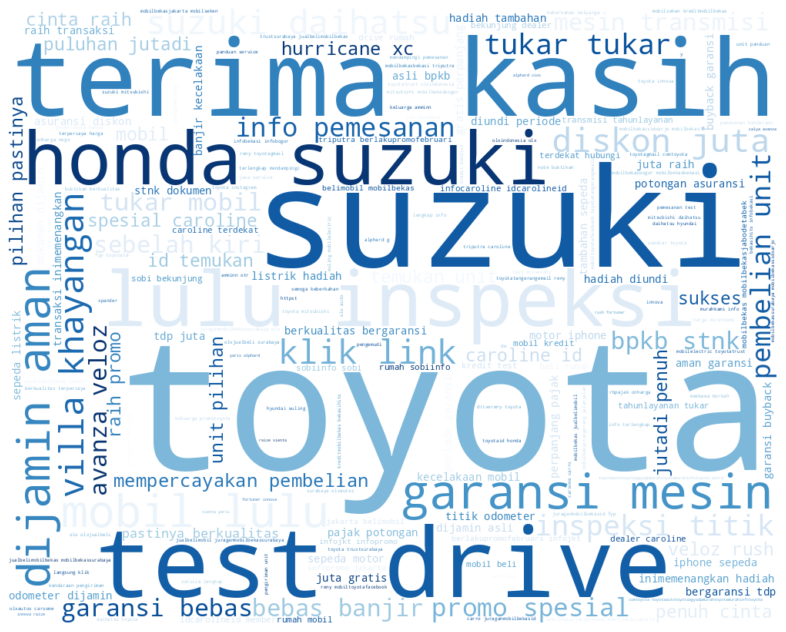

In [32]:
# Contoh Visualisasi top ranking kata istilah (terms) dari TF-IDF
all_text = ' '.join(word for word in df['lemmatizedtext'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=800,
                      mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#Evaluasi

In [33]:
# Step 6: Evaluasi
# ==================


def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


# Contoh penggunaan
X = np.array(df['TF_IDF_Vec'].to_list())
y = np.array(df['sentiment'])

model = MultinomialLogisticRegression()
model.fit(X, y)

predictions = model.predict(X)

# Menghitung akurasi
accuracy = calculate_accuracy(y, predictions)
print(f'Accuracy: {accuracy}')

IndexError: index 10 is out of bounds for axis 0 with size 10